## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import qr
from plotnine import *

## Quetion 6

In [2]:
# convert C to diagonizable matrix E
C = np.array([[5,5],[-1,7]])
E = np.matmul(C.T,C)
print(E)

[[26 18]
 [18 74]]


In [3]:
# find Eigenvalues decomposition for E
eig_vals,U_orth = np.linalg.eig(E)
print("Eigen values are: " ,eig_vals)
print("the Orthogonal matrix U is: \n", U_orth)

Eigen values are:  [20. 80.]
the Orthogonal matrix U is: 
 [[-0.9486833  -0.31622777]
 [ 0.31622777 -0.9486833 ]]


## 3D gausian imported code

In [4]:
mean = [0, 0, 0]
cov = np.eye(3)
x_y_z = np.random.multivariate_normal(mean, cov, 50000).T

In [5]:
def get_orthogonal_matrix(dim):
    H = np.random.randn(dim, dim)
    Q, R = qr(H)
    return Q


def plot_3d(x_y_z):
    '''
    plot points in 3D
    :param x_y_z: the points. numpy array with shape: 3 X num_samples (first dimension for x, y, z
    coordinate)
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_y_z[0], x_y_z[1], x_y_z[2], s=1, marker='.', depthshade=False)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


def plot_2d(x_y):
    '''
    plot points in 2D
    :param x_y_z: the points. numpy array with shape: 2 X num_samples (first dimension for x, y
    coordinate)
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_y[0], x_y[1], s=1, marker='.')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')


## Question 11

Text(0.5, 0.92, 'Random Points taken from the Multivariate normal distribution')

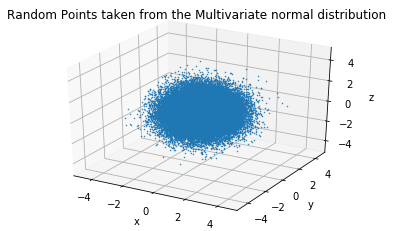

In [6]:
# plot the data generated with the identity covariance matrix
plot_3d(x_y_z)
plt.title("Random Points taken from the Multivariate normal distribution")

## Question 12

In [7]:
S = np.array([[0.1,0,0], [0,0.5,0],[0,0,2]])
scaled_data = np.matmul(S, x_y_z)

Covariance matrix after data scaling (values rounded): 
 [[ 0. -0.  0.]
 [-0.  0.  0.]
 [ 0.  0.  4.]]


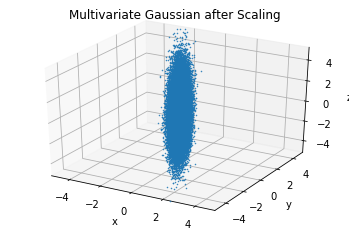

In [8]:
# calculate the covariance matrix estimator for the random variables X1, X2, X3
cov_mat = np.cov(scaled_data)
print("Covariance matrix after data scaling (values rounded): \n", np.around(cov_mat))

plot_3d(scaled_data)
plt.title("Multivariate Gaussian after Scaling")
plt.show()

## Question 13

Covariance matrix for scaled and rotated data (values rounded): 
 [[ 2. -2. -1.]
 [-2.  1.  1.]
 [-1.  1.  1.]]


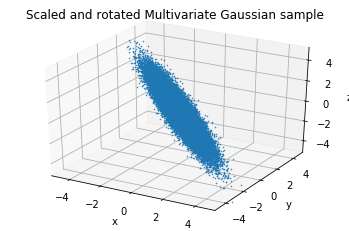

In [9]:
rand_mat = get_orthogonal_matrix(3)
rotated_scaled_data = np.matmul(rand_mat, scaled_data)
cov_mat = np.cov(rotated_scaled_data)
print("Covariance matrix for scaled and rotated data (values rounded): \n", np.around(cov_mat))

plot_3d(rotated_scaled_data)
plt.title("Scaled and rotated Multivariate Gaussian sample")
plt.show()

## Question 14

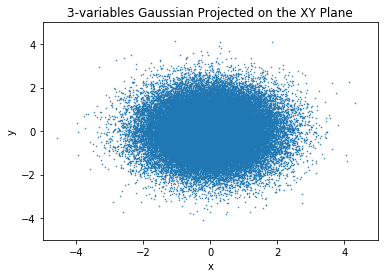

In [10]:
plot_2d(x_y_z)
plt.title("3-variables Gaussian Projected on the XY Plane")
plt.show()

## Question 15

In [11]:
df = pd.DataFrame(x_y_z).T
df.columns = ['x','y','z']
filtered = df.query('(z < 0.1) & (z > -0.4)').T
print(filtered.shape, df.shape)

(3, 9867) (50000, 3)


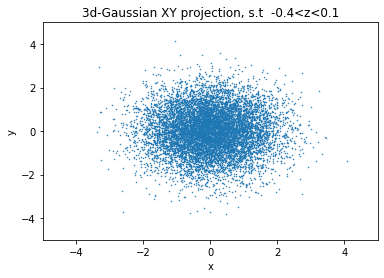

In [12]:
plot_2d(filtered.to_numpy())
plt.title("3d-Gaussian XY projection, s.t  -0.4<z<0.1")
plt.show()

## Q16

In [13]:
# Generate Data
data = np.random.binomial(1 ,.25, (100000, 1000))
data = pd.DataFrame(data)

### a)

Text(0, 0.5, 'Sample mean')

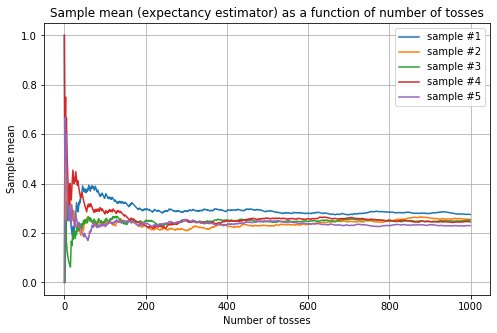

In [14]:
df = data.head()
cum_mean = (df.cumsum(axis=1) / np.arange(1, df.shape[1] + 1)).T
cum_mean.columns = [f"sample #{i+1}" for i in cum_mean.columns]

cum_mean.plot(figsize=(8,5),grid=1)
plt.title("Sample mean (expectancy estimator) as a function of number of tosses")
plt.xlabel("Number of tosses")
plt.ylabel("Sample mean")

## b)

In [19]:
def compute_chevishev_bound(size, epsilon):
    """
    computes confidence bound for the mean estimator of a bernouli parameter, as a function of the sample size.
    the bound is according to Chevishev inequality
    :param size - the size of the sample
    :param epsilon - determines the confidence interval.
    """
    bernouli_var_ubound = .25
    return np.clip(bernouli_var_ubound / (np.arange(1, size+1) * epsilon**2), 0, 1)

def compute_hoeffding_bound(size, epsilon):
    """
    computes confidence bound for the mean estimator of a bernouli parameter, as a function of the sample size.
    the bound is according to Hoeffding inequality
    :param size - the size of the sample
    :param epsilon - determines the confidence interval.
    """
    return np.clip(2 * np.exp(-2 * (np.arange(1, size+1) * epsilon**2)), 0, 1)

def generate_bound_comparison(size, epsilon):
    df = pd.DataFrame({"Sample size":np.arange(1, size+1),"Chevishev": compute_chevishev_bound(data.shape[1], eps), "Hoeffding":compute_hoeffding_bound(data.shape[1], eps)})
#     df = df.melt(id_vars="Sample size").rename(columns={'variable':'Bound'})
    return df


def compute_diff_percentage(df, p, epsilon):
    """generate the mean estimator failrue rate of all samples as a function of a sample size. 
    given the true parameter, a failure is defined by distance of estimate to parameter higher than epsilon"""

    p_hat = df.cumsum(axis=1) / np.arange(1, df.shape[1] + 1) 
    condition = ((abs(p_hat - p) > epsilon).sum()) / df.shape[0]
    percentage = pd.DataFrame({"Sample size" : np.arange(1,df.shape[1] + 1), "failrue rate": condition})
    return percentage

In [20]:
plots_b = []
plots_c = []
dfs = []
for eps in [.5, .25, .1, .01,.001]:
    
    bounds_df = generate_bound_comparison(data.shape[1], eps)
    merged_df = pd.merge(left=bounds_df, right=compute_diff_percentage(data,.25, eps), on='Sample size')
    
    
    # generate graphs for b
    bounds_df = bounds_df.melt(id_vars="Sample size").rename(columns={'variable':'Bound'})
    title_b = r"Upper Bound for $\mathbb{{P}}_{X_{1}\dotsX_{m}} \left(\left|\bar{X}_{m} - \mathbb{{E}}\left(X\right)\right| > " +\
        str(eps) + r"\right)$"
    
    plots_b.append(ggplot(bounds_df) +aes(x="Sample size", y="value", color='Bound') + ylim(0,1) + geom_line() + ggtitle(title_b))

    
    
    # generate graphs for c
    merged_df = merged_df.melt(id_vars="Sample size").rename(columns={'variable':'line'})
    title_c = r"Mean estimate failure rate for parameter .25 and $\varepsilon=$ {0}".format(eps)
    plots_c.append(ggplot(merged_df) + aes(x="Sample size", y="value", color='line') + ylim(0,1) + geom_line() + ggtitle(title_c))
  

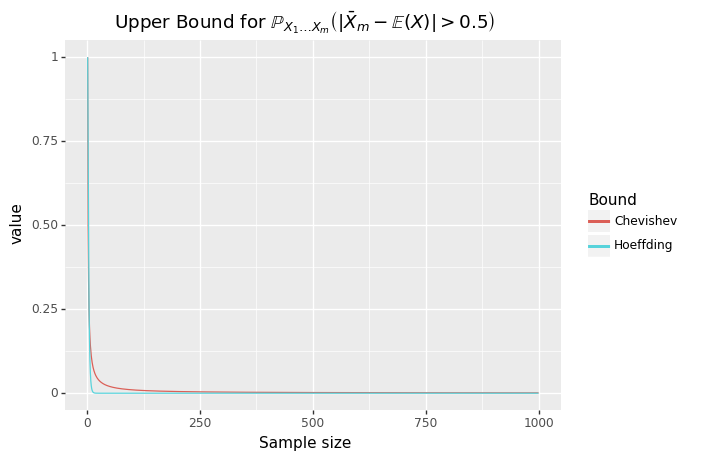

<ggplot: (-9223371916863513312)>


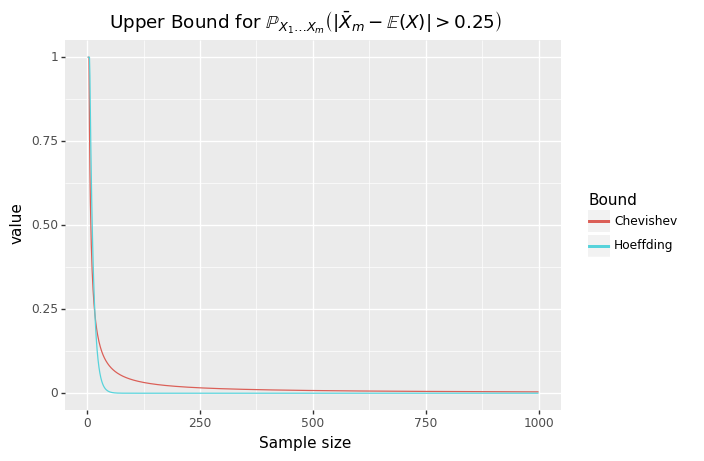

<ggplot: (-9223371916883484136)>


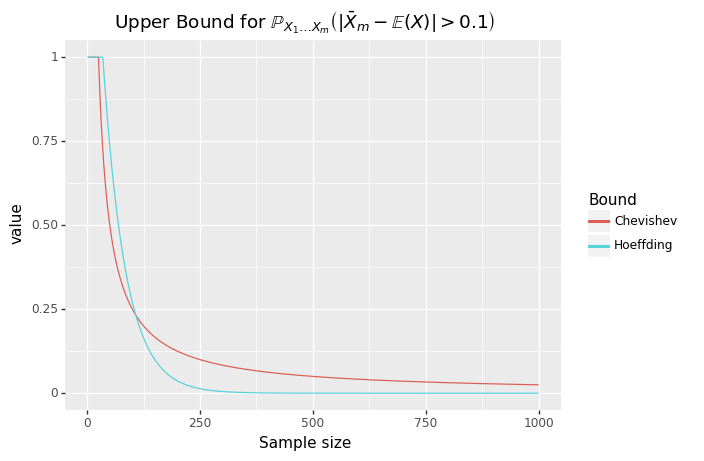

<ggplot: (-9223371916864625652)>


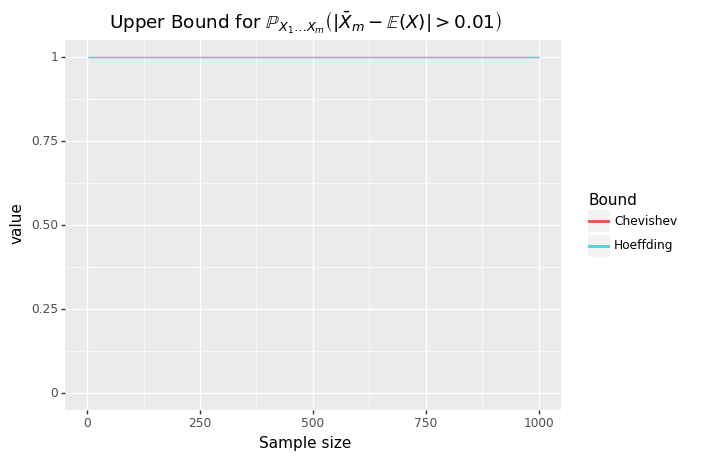

<ggplot: (-9223371916864600792)>


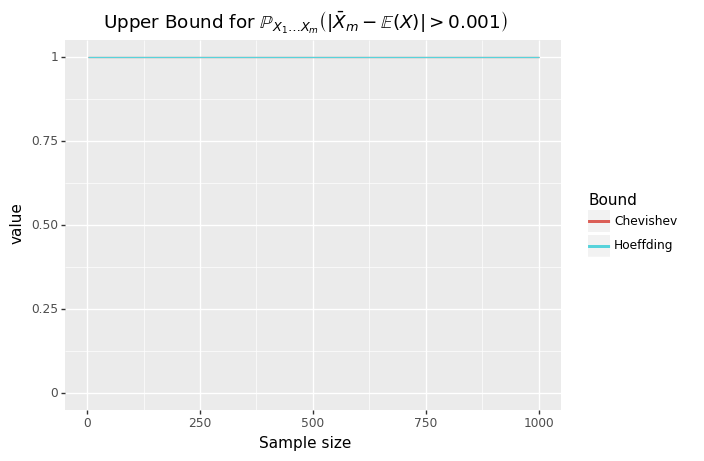

<ggplot: (-9223371916864138584)>


[None, None, None, None, None]

In [21]:
[print(p) for p in plots_b]

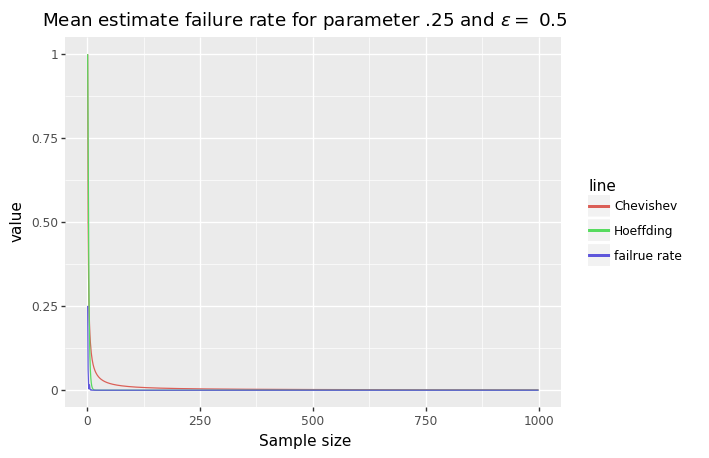

<ggplot: (-9223371916863515808)>


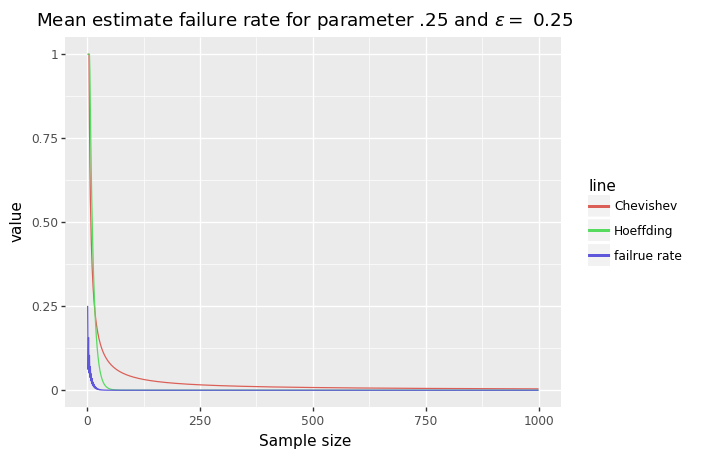

<ggplot: (-9223371916883407088)>


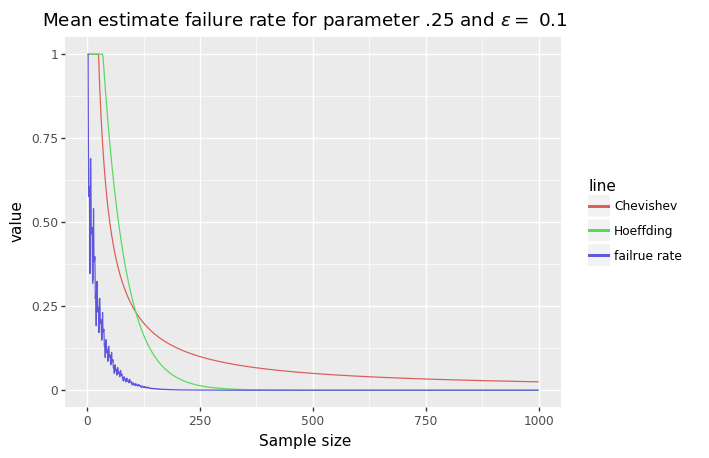

<ggplot: (-9223371916863523016)>


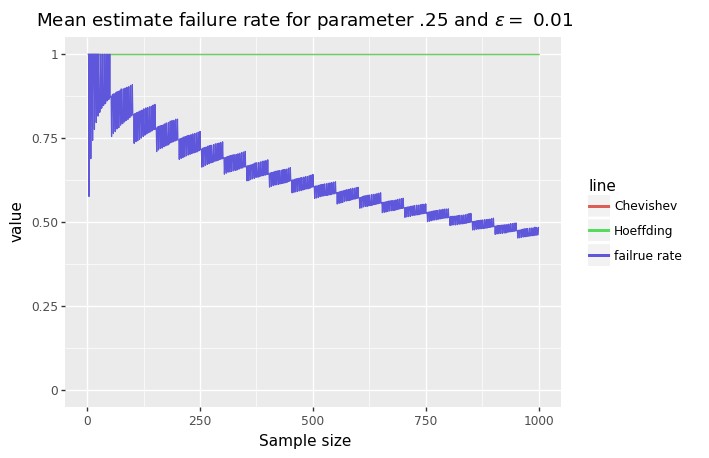

<ggplot: (-9223371916884901004)>


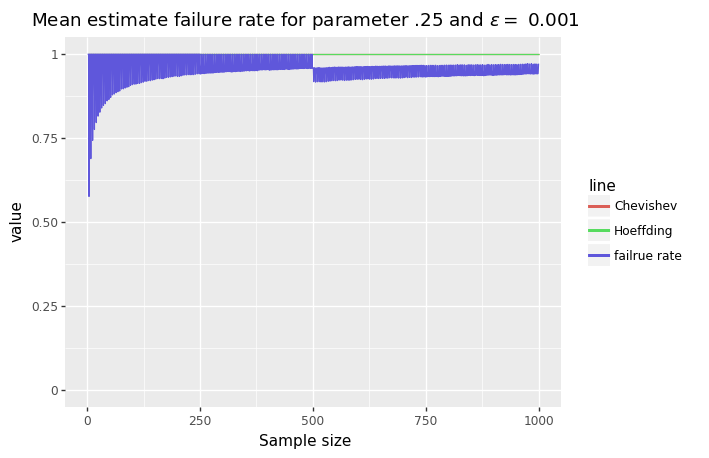

<ggplot: (-9223371916864135736)>


[None, None, None, None, None]

In [22]:
[print(p) for p in plots_c]